# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
#create a dataframe with the values of the table
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [6]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

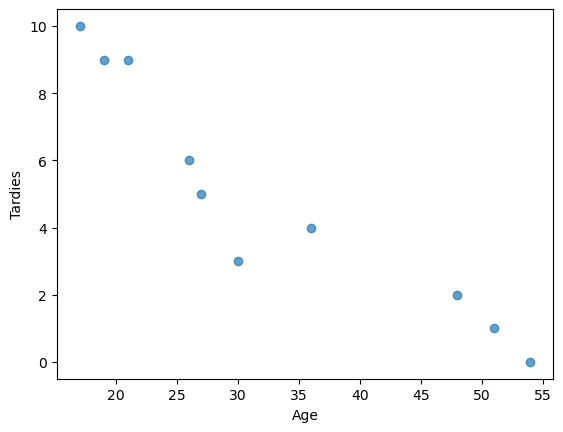

In [7]:
X = student_data['Age']
y = student_data['Tardies']
plt.plot(X, y, "o", alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

* as age increase tardies decrease *

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
#If the covariance is negative, it means that when 
#one variable increases, the other variable tends to decrease.

In [9]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# normalizes the covariance by the standard deviations of the variables.
# negative number indicates that as "Age" increases, the number of "Tardies" tends to decrease.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# We are using the simple linear regression

# Reshape the data to fit the model
# We are not going to split the data into train and test because the data is to small
X = student_data['Age'].values.reshape(-1, 1)  # reshape data to get 2 dimensions
y = student_data['Tardies'].values

# Create the linear regression model
model = LinearRegression()

#fPerform the fitting with the data
model.fit(X, y)

# Get the slope (coefficient) and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

# Predict y values
y_pred = model.predict(X)



Slope (coefficient): -0.2428207709159809
Intercept: 12.888803363135771


In [11]:
# I added a predictor of tardies based on my age

# Age for which you want to predict tardies
age_to_predict = 32

# Reshape the age value into a 2D array
age_to_predict_reshaped = np.array(age_to_predict).reshape(-1, 1)

# Use the model to predict tardies for the given age
predicted_tardies = model.predict(age_to_predict_reshaped)

# Print the predicted number of tardies
print(f'Predicted Tardies for an Age of 32: {predicted_tardies[0]}')

Predicted Tardies for an Age of 32: 5.118538693824383


Plot your regression model on your scatter plot.

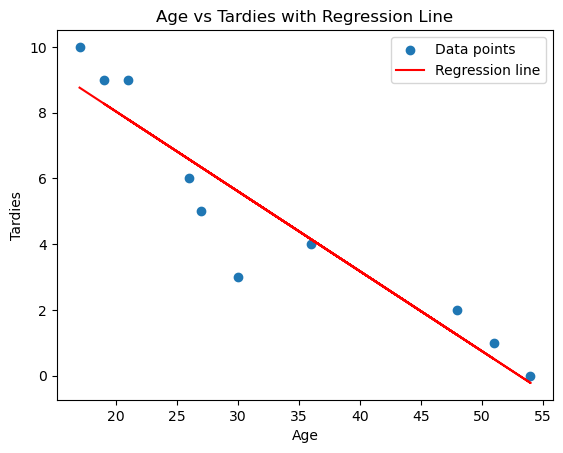

In [13]:
## Scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], label='Data points')
# Regression line
plt.plot(student_data['Age'], y_pred, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies with Regression Line')
plt.legend()
plt.show()

In [ ]:
# more data would have given more strength to the model 
# relative to its predictive capabilities.
# Yes, age is a good predictor of tardiness given the strong 
# negative correlation of -0.939163.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [18]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Analysis variables : Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
# Outcome variable : CO2 Emission Grams/Mile
vehicles.columns
features = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
label = vehicles['CO2 Emission Grams/Mile' ]


In [16]:
relation = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year",'CO2 Emission Grams/Mile' ]]
relation.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
# The most important features to determinate CO2 emisions are the most linkted variables
# that are Fuel barrels / and dfuel cost/year

# The variable that provides the least useful information about co2 emissions is : Year. With a correlation of -0.22.
# Cylinders is more significant with 0.75 but not enough to be relevant.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


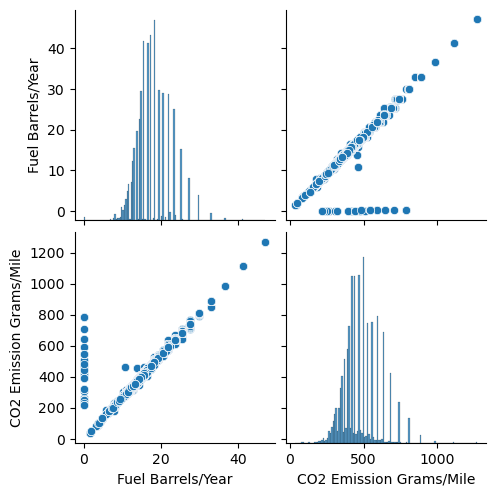

In [17]:
#import seaborn as sns
important = relation[['Fuel Barrels/Year','CO2 Emission Grams/Mile']]
sns.pairplot(important)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.


In [43]:
# We are using the simple linear regression
# Reshape the data to fit the model

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile'].values


# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

#Fitting the model
model.fit(X_train, y_train)

# Get the slope (coefficient) and intercept of the line
slope = model.coef_
intercept = model.intercept_
print(f'Slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

# Predictions on training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



Slope (coefficient): [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143338


In [44]:
# Model evaluation
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R^2 Score: {r2_train:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

Train RMSE: 16.33
Test RMSE: 17.02
Train R^2 Score: 0.9812
Test R^2 Score: 0.9795


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Variables of the car for which you want to predict co2 emissions
new_car = [2012, 6, 70, 12, 20000]

# Reshape the variable values into a 2D array
new_car_reshaped = np.array(new_car).reshape(1, -1)

# Use the model to predict co2 emissions for the given parameters
predicted_co2 = model.predict(new_car_reshaped)

# Print the predicted co2 emissions
print(f'The predicted CO2 emissions for the car are : {predicted_co2[0]}'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
import statsmodels.api as sm

est = sm.OLS(y, X) # Creates an object OLS estimator
est = est.fit()
est.summary()

In [ ]:
# The most important variable is Fuel Barrels/Year, it has the highest correlation to the co2 emissions and the highest coefficient in the linear regression model.
# In order of coefficient comes next : Combined MPG, Cylinders, Year and then Fuel Cost/Year.

# From our model, we can get predictions on the co2 emissions of cars by taking into account all of their metrics : 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
# store data into a dictionary
data = {
    "X":[1,3,4,6,8,9,11,14],
    "Y":[1,2,4,4,5,7,8,13]
    
}

#store data into a df
df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

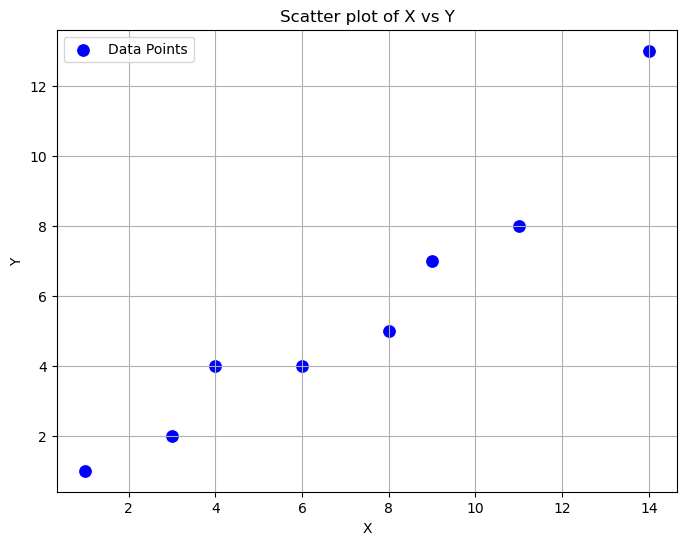

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X', y='Y', data=df, color='blue', s=100, label='Data Points')
plt.title('Scatter plot of X vs Y')
plt.grid(True)


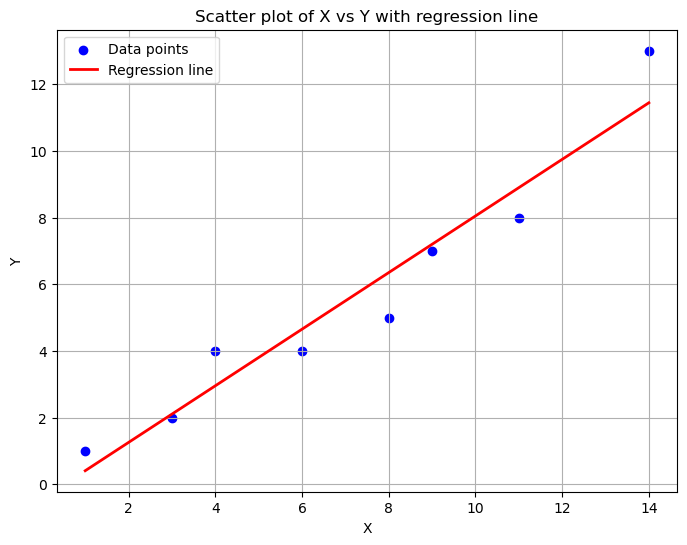

In [26]:
# Extract X and Y values
X = df[['X']]
y = df['Y']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict Y values
y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

plt.title('Scatter plot of X vs Y with regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Get the slope (coefficient) and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

Slope (coefficient): 0.8484848484848485
Intercept: -0.43939393939393945


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

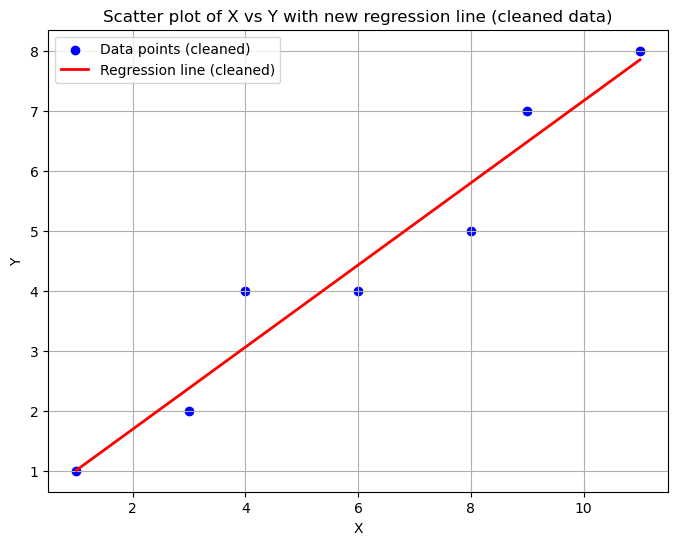

In [45]:
# From the scatter plot we identify an outlier in the point 14,13. 
# We will remove this point and refit the moddel 
X_cleaned = df[['X']].iloc[0:7]
y_cleaned = df[['Y']].iloc[0:7]

# Fit the linear regression model with cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_cleaned, y_cleaned)

# Predict Y values with cleaned data
y_pred_cleaned = model_cleaned.predict(X_cleaned)


# Plot the cleaned data points and new regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_cleaned, y_cleaned, color='blue', label='Data points (cleaned)')
plt.plot(X_cleaned, y_pred_cleaned, color='red', linewidth=2, label='Regression line (cleaned)')

plt.title('Scatter plot of X vs Y with new regression line (cleaned data)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# Get the slope (coefficient) and intercept of the line
slope = model_cleaned.coef_
intercept = model_cleaned.intercept_
print(f'Slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

# intercept: the value of y when x=0 it represents the starting point
# regression line on the y-axis

# slope: indicates how much Y changes for eaach unit change in X it provides
# the rate of increaase or decrease in Y relative to X 


Slope (coefficient): [[0.68421053]]
Intercept: [0.32330827]


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*